In [9]:
import os
import csv

Need to think of which results I want to present at the end.


    Nodes                           4               5           6               7           8           9           10
                                FIFO | LIFO   FIFO | LIFO   FIFO | LIFO   FIFO | LIFO   FIFO | LIFO   FIFO | LIFO    

Average Bursty Throughput
Average Bursty Latency
Average Continuous Throughput
Average Continuous Throughput

In [20]:
# Need to load in data across different densities then take the average

dir = "results3/"

node_dirs = os.listdir(dir)

results = {}

for node_dir in node_dirs:
    
    n_str = node_dir.split("-")[0]
    
    fifo_bursty_throughput = []
    fifo_bursty_latency = []
    fifo_continuous_throughput = []
    fifo_continuous_latency = []

    lifo_bursty_throughput = []
    lifo_bursty_latency = []
    lifo_continuous_throughput = []
    lifo_continuous_latency = []

    density_dirs = os.listdir(dir+node_dir) 
    
    for density_dir in density_dirs:
        
        csvs = os.listdir(dir+node_dir+"/"+density_dir+"/csvs")
        
        for csv_ in csvs:
            
            csvfile = dir+node_dir+"/"+density_dir+"/csvs/"+csv_

            with open(csvfile, mode='r') as file:
                # Create a csv.DictReader object
                reader = csv.DictReader(file)
                # Convert the reader object to a list of dictionaries
                data = list(reader)
                
                
            for row in data:
                
                if row['Queue_Type'] == "FIFO":
                    
                    if row['Test_Type'] == "BURSTY":
                        fifo_bursty_throughput.append(float(row['Packets_Received']))
                        fifo_bursty_latency.append(float(row['Average_Latency']))
                    else:
                        fifo_continuous_throughput.append(float(row['Packets_Received']))
                        fifo_continuous_latency.append(float(row['Average_Latency']))
                          
                else:
                    if row['Test_Type'] == "BURSTY":
                        lifo_bursty_throughput.append(float(row['Packets_Received']))
                        lifo_bursty_latency.append(float(row['Average_Latency']))
                    else:
                        lifo_continuous_throughput.append(float(row['Packets_Received']))
                        lifo_continuous_latency.append(float(row['Average_Latency']))

                        
    avg_fifo_bursty_throughput = sum(fifo_bursty_throughput)/len(fifo_bursty_throughput)
    avg_fifo_bursty_latency = sum(fifo_bursty_latency)/len(fifo_bursty_latency)
    avg_fifo_continuous_throughput = sum(fifo_continuous_throughput)/len(fifo_continuous_throughput)
    avg_fifo_continuous_latency = sum(fifo_continuous_latency)/len(fifo_continuous_latency)

    avg_lifo_bursty_throughput = sum(lifo_bursty_throughput)/len(lifo_bursty_throughput)
    avg_lifo_bursty_latency = sum(lifo_bursty_latency)/len(lifo_bursty_latency)
    avg_lifo_continuous_throughput = sum(lifo_continuous_throughput)/len(lifo_continuous_throughput)
    avg_lifo_continuous_latency = sum(lifo_continuous_latency)/len(lifo_continuous_latency)

    
    print(f"N={n_str}")
    
    results.setdefault('avg_bursty_throughput_fifo', []).append((int(n_str), avg_fifo_bursty_throughput))
    results.setdefault('avg_bursty_throughput_lifo', []).append((int(n_str), avg_lifo_bursty_throughput))

    results.setdefault('avg_continuous_throughput_fifo', []).append((int(n_str), avg_fifo_continuous_throughput))
    results.setdefault('avg_continuous_throughput_lifo', []).append((int(n_str), avg_lifo_continuous_throughput))
    
    results.setdefault('avg_bursty_latency_fifo', []).append((int(n_str), avg_fifo_bursty_latency))
    results.setdefault('avg_bursty_latency_lifo', []).append((int(n_str), avg_lifo_bursty_latency))
    
    results.setdefault('avg_continuous_latency_fifo', []).append((int(n_str), avg_fifo_continuous_latency))
    results.setdefault('avg_continuous_latency_lifo', []).append((int(n_str), avg_lifo_continuous_latency))


    # print(f"Avg bursty throughput {avg_fifo_bursty_throughput}, {avg_lifo_bursty_throughput}")
    # print(f"Avg continuous throughput {avg_fifo_continuous_throughput}, {avg_lifo_continuous_throughput}")
    # print(f"Avg bursty latency {avg_fifo_bursty_latency}, {avg_lifo_bursty_latency}")
    # print(f"Avg continuous latency {avg_fifo_continuous_latency}, {avg_lifo_continuous_latency}")
 
                
    
# print(node_dirs)


N=7
N=5
N=4
N=6
N=8
N=10
N=9


Ok I need one more table. It'll show average percent improvement from fifo to lifo queue

                    Average FIFO, Average LIFO, Average % Improvement

Bursty throughput 
Continuous throughput 
Bursty latency 
Continuous latency 


In [23]:
import numpy as np
# Function to calculate average percentage improvement from FIFO to LIFO
def calculate_improvement(fifo_data, lifo_data, is_latency=False):
    improvements = []
    fifo_data = sorted(fifo_data)
    lifo_data = sorted(lifo_data)

    # Ensure data is sorted and aligned properly
    for fifo, lifo in zip(fifo_data, lifo_data):
        if fifo[0] == lifo[0]:  # The 'n' values must match
            if fifo[1] != 0:  # Avoid division by zero
                improvement = ((fifo[1] - lifo[1]) / fifo[1] * 100) if is_latency else ((lifo[1] - fifo[1]) / fifo[1] * 100)
                improvements.append(improvement)
    
    # Return average of improvements
    return np.mean(improvements) if improvements else 0

# Calculate the improvements for each category
avg_improvements = {
    'Bursty Throughput': calculate_improvement(results['avg_bursty_throughput_fifo'], results['avg_bursty_throughput_lifo']),
    'Continuous Throughput': calculate_improvement(results['avg_continuous_throughput_fifo'], results['avg_continuous_throughput_lifo']),
    'Bursty Latency': calculate_improvement(results['avg_bursty_latency_fifo'], results['avg_bursty_latency_lifo'], is_latency=True),
    'Continuous Latency': calculate_improvement(results['avg_continuous_latency_fifo'], results['avg_continuous_latency_lifo'], is_latency=True),
}

# Prepare to display the table (in a simple text format or for further processing)
table_header = "Metric, Average FIFO, Average LIFO, Average % Improvement\n"
table_rows = []

for metric, improvement in avg_improvements.items():
    avg_fifo = np.mean([x[1] for x in results[f'avg_{metric.lower().replace(" ", "_")}_fifo']])
    avg_lifo = np.mean([x[1] for x in results[f'avg_{metric.lower().replace(" ", "_")}_lifo']])
    table_rows.append(f"{metric}, {avg_fifo:.2f}, {avg_lifo:.2f}, {improvement:.2f}%")

# Output the table
print(table_header + "\n".join(table_rows))

Metric, Average FIFO, Average LIFO, Average % Improvement
Bursty Throughput, 1307.69, 1327.87, 1.46%
Continuous Throughput, 1310.87, 1330.09, 1.39%
Bursty Latency, 57.19, 56.34, -1.53%


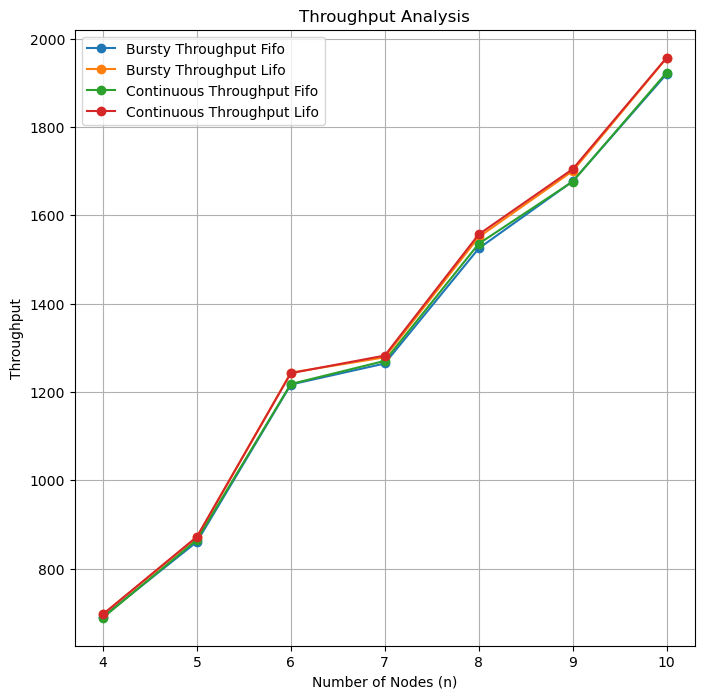

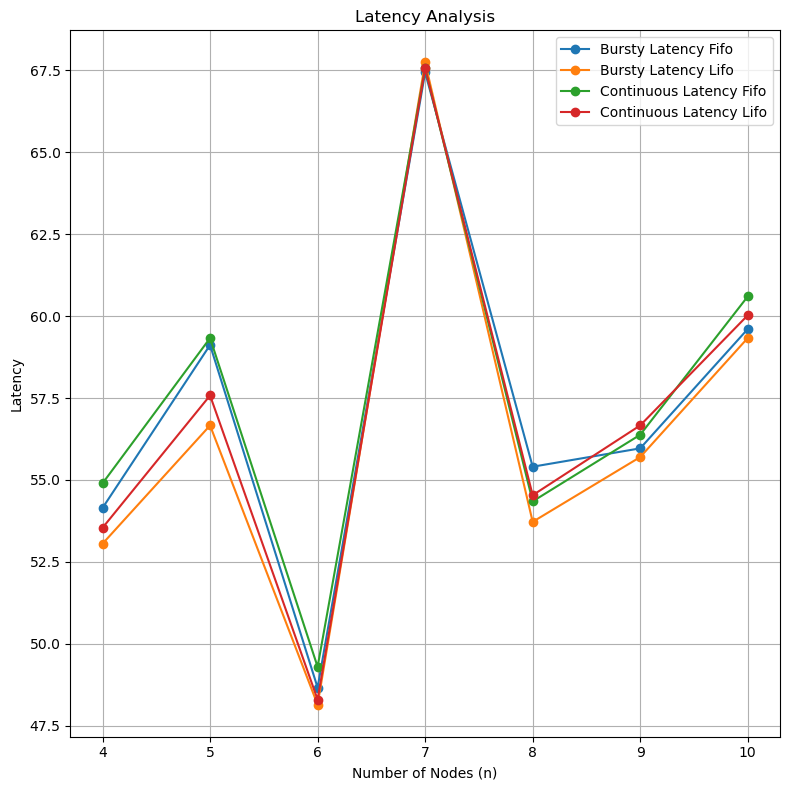

In [21]:
import matplotlib.pyplot as plt

# Sort the data based on the 'n' value (the first element of each tuple)
for key in results.keys():
    results[key] = sorted(results[key], key=lambda x: x[0])

# Create the plots
plt.figure(figsize=(8, 8))

# Plot for throughput
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
for key in ['avg_bursty_throughput_fifo', 'avg_bursty_throughput_lifo', 'avg_continuous_throughput_fifo', 'avg_continuous_throughput_lifo']:
    x, y = zip(*results[key])
    plt.plot(x, y, marker='o', label=key.replace('avg_', '').replace('_', ' ').title())
plt.title('Throughput Analysis')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Throughput')
plt.legend()
plt.grid(True)

# Plot for latency
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.figure(figsize=(8, 8))

for key in ['avg_bursty_latency_fifo', 'avg_bursty_latency_lifo', 'avg_continuous_latency_fifo', 'avg_continuous_latency_lifo']:
    x, y = zip(*results[key])
    plt.plot(x, y, marker='o', label=key.replace('avg_', '').replace('_', ' ').title())
plt.title('Latency Analysis')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Plots:

Throughput vs Nodes

plot bursty vs continuous


Latency

Latency vs. Nodes

plot bursty and continuous

